# 확률적 경사 하강법

## SGDClassifier

In [4]:
import pandas as pd  # pandas 라이브러리 불러오기

fish = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fish.csv')  # 데이터셋 읽기

In [5]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()  # 입력 데이터 배열로 변환
fish_target = fish['Species'].to_numpy()  # 타깃 데이터 배열로 변환

In [16]:
from sklearn.model_selection import train_test_split  # 데이터 분할 함수 불러오기

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42  # 타깃 비율 유지하며 분할
)

In [19]:
from sklearn.preprocessing import StandardScaler  # 표준화 함수 불러오기

ss = StandardScaler()  # 표준화 객체 생성
ss.fit(train_input)  # 훈련 데이터로 표준화 파라미터 계산
train_scaled = ss.transform(train_input)  # 훈련 데이터 표준화
test_scaled = ss.transform(test_input)  # 테스트 데이터 표준화

In [20]:
from sklearn.linear_model import SGDClassifier

In [18]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # 로지스틱 손실 함수 사용, 최대 10번 반복, 랜덤 시드 42
sc.fit(train_scaled, train_target) # 훈련 데이터로 모델 훈련

print(sc.score(train_scaled, train_target)) # 훈련 데이터 점수
print(sc.score(test_scaled, test_target)) # 테스트 데이터 점수

0.23529411764705882
0.225


c:\Users\ryan9\anaconda3\envs\ai_env\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [21]:
sc.partial_fit(train_scaled, train_target) # 훈련 데이터로 모델 훈련

print(sc.score(train_scaled, train_target)) # 훈련 데이터 점수
print(sc.score(test_scaled, test_target)) # 테스트 데이터 점수

0.6218487394957983
0.675


## 에포크와 과대/과소 적합

In [22]:
import numpy as np  

sc = SGDClassifier(loss='log_loss', random_state=42)    # 로지스틱 손실 함수 사용

train_score = []    # 훈련 점수
test_score = []

classes = np.unique(train_target)    # 클래스 레이블 추출

In [23]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)     # 훈련 데이터로 모델 훈련
    
    train_score.append(sc.score(train_scaled, train_target))        # 훈련 점수
    test_score.append(sc.score(test_scaled, test_target))           # 테스트 점수

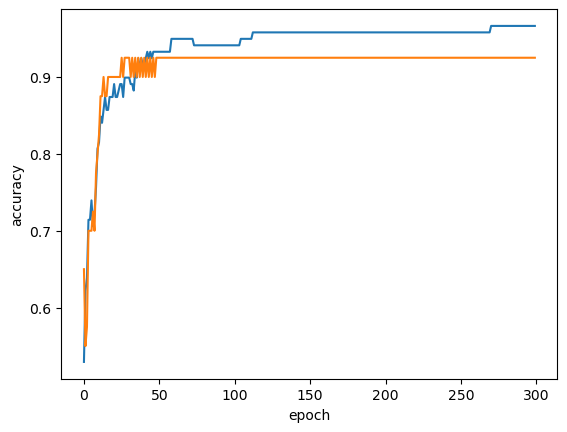

In [24]:
import matplotlib.pyplot as plt

plt.plot(train_score)     # 훈련 점수 그래프
plt.plot(test_score)      # 테스트 점수 그래프
plt.xlabel('epoch')      # x축 레이블
plt.ylabel('accuracy')   # y축 레이블
plt.show()               # 그래프 표시

In [25]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42) # 손실 함수: 로지스틱 손실 함수, 최대 반복 횟수: 100, 조기 종료 없음, 랜덤 시드: 42
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))    # 훈련 데이터 점수
print(sc.score(test_scaled, test_target))      # 테스트 데이터 점수

0.957983193277311
0.925


In [26]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) # 손실 함수: 힌지 손실 함수, 최대 반복 횟수: 100, 조기 종료 없음, 랜덤 시드: 42
sc.fit(train_scaled, train_target) # 훈련 데이터로 모델 훈련

print(sc.score(train_scaled, train_target)) # 훈련 데이터 점수
print(sc.score(test_scaled, test_target)) # 테스트 데이터 점수

0.9495798319327731
0.925
